# Huber \& Braun  model Plus hyperpolarization-activated current  (HB+Ih)
We use  a model of the static firing patterns of the cold thermoreceptors that a hyperpolarization-activated current (I$_\text{h}$) was added to the Huber \& Braun (HB) model. This extended model(HB+Ih) was developed
to satisfy two requirements: It exhibits most of the types of the firing patterns recorded in experiments, and it displays chaotic behavior quantifying  by the maximal Lyapunov exponent (MLE) of the voltage trajectories at physiological temperatures, namely in the 32 -- 38\degree C range. The membrane action potential of a HB+Ih neuron follows the dynamics:

$$\begin{equation}\label{eq:current}
C_{m}  \frac{dV}{dt} = -I_{sd} - I_{sr} -I_h - I_d-I_r-I_l+I_{syn}\text{ ,}
\end{equation}$$

where $V$ is the membrane capacitance; $I_d$, $I_r$, $I_{sd}$, $I_{sr}$  are depolarizing (Na$_\text{V}$), repolarizing (K$_\text{dr}$), slow depolarizing (Na$_\text{P}$ / Ca$_\text{T}$) and slow repolarizing (K$_\text{Ca}$) currents, respectively. $I_h$ stands for hyperpolarization-activated current, $I_l$ represents the leak current, and lastly term $I_{syn}$ is the synaptic current. Currents (except $I_{syn}$) are defined as:
\begin{equation}\label{eq:Ii}
I_i=\rho(T)g_i a_i (V-E_i) \qquad i=d,r,sd,h,l;
\end{equation}
\begin{equation}\label{eq:Isr}
I_{sr}=\rho(T) g_{sr} \frac{a^2_{sr}}{a^2_{sr}+0.4^2}\left(V-E_{sr} \right) \text{ ,}
\end{equation}


where $a_i$ is an activation term that represents the open probability of the channels ($a_l\equiv 1$), with the exception of $a_{sr}$ that represents intracellular Calcium concentration. Parameter $g_i$ is the maximal conductance density, $E_i$ is the reversal potential and the function $\rho(T)$ is a temperature dependent scale factor for the current. 
The activation terms $a_r$, $a_{sd}$ and $a_h$ follow the differential equations: 
\begin{equation}\label{eq:ai}
\frac{da_i}{dt}=\phi(T)\frac{a^{\infty}_i(V) - a_i}{\tau_i} \qquad i=r,sd,h,
\end{equation}
where
\begin{equation}
a_i^{\infty}(V)=\frac{1}{1+\exp{\left(-s_i\left(V-V_i^0\right)\right)}} \text{.}
\end{equation}
On the other hand, $a_{sr}$ follows
\begin{equation}\label{eq:asr}
\frac{da_{sr}}{dt}=\phi(T)\frac{\eta I_{sd}-\kappa a_{sr}}{\tau_{sr}}  \text{.}
\end{equation}
Finally,
\begin{equation}
a_d=a_d^{\infty}=\frac{1}{1+\exp{\left(-s_d\left(V-V_d^0\right)\right)}} \text{.}
\end{equation}
The function $\phi(T)$  is a temperature factor for channel kinetics. The temperature-dependent functions for conductance $\rho(T)$  for kinetics $\phi(T)$  are given, respectively, by:
\begin{equation}\label{eq:rhophi}
\rho(T)=1.3^{\frac{T-25}{10}} \qquad \phi(T)=3^{\frac{T-25}{10}}\text{.}
\end{equation}

		

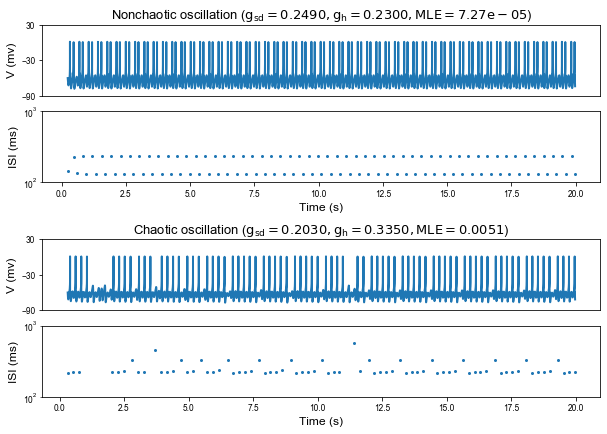

In [6]:
import numpy as np
from scipy.stats import norm
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os.path
from matplotlib import colors

from matplotlib import rc, cm
import matplotlib.gridspec as gridspec

#Forma clásica de matplotlib, pero con la ventaja de poder hacer subscripts

#plt.rc('font', size = 14)
#plt.rcParams['mathtext.fontset'] = 'custom'
#plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#plt.rcParams['svg.fonttype'] = 'none'

#Fonts de Latex

plt.rcParams['mathtext.sf'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('lines', linewidth=2, color='r')
"""
Aquí definimos una funcion que toma las variables a tiempo t
y devuelve las derivadas
"""
def HyB(Var,t,tempF):
    [rrho,pphi] = tempF 
    [v,ar,asd,ca,ah]=Var
    ad = 1/(1+np.exp(-zd*(v-V0d)))
    isd = rrho*gsd*asd*(v - Ed)
    #Imemb=isd + rho*gd*ad*(v - Ed) + rho*(gr*ar + gsr*asr)*(v-Er) + gl*(v - El)
    Imemb = isd + rrho*gd*ad*(v - Ed) + rrho*(gr*ar + gsr*(ca**2)/(ca**2+0.4**2))*(v-Er) + rrho*gl*(v - El) \
                + rrho*gh*ah*(v - Eh) 
    arinf = 1/(1+np.exp(-zr*(v-V0r)))
    asdinf = 1/(1+np.exp(-zsd*(v-V0sd)))
    ahinf = 1/(1+np.exp(-zh*(v-V0h)));
    
    return np.array([-Imemb,
                pphi*(arinf - ar)/tr,
                pphi*(asdinf - asd)/tsd,
                pphi*(-eta*isd - kappa*ca)/tsr,
                pphi*(ahinf-ah)/th])

def ISIS(spkf):
    ISIs = np.diff(spkf)
    return ISIs

#default parameters sets 
gd = 2.5; gr = 2.8; gsd = 0.21; gsr = 0.28;
gl = 0.06; gh = 0.4; gtrek=0.06;  #Ojo con gh, el prof alfredo tiene 0.6
V0d = -25; V0r = -25; zd = 0.25; zr = 0.25;tr = 2;
V0sd = -40; zsd = 0.11; tsd = 10;
eta = 0.014; kappa = 0.18; tsr = 35;
V0h= -85; zh = -0.14; th=125;


Ed = 50; Er = -90; El = -80; Eh = -30;

temp=36
rho=1.3**((temp-25.)/10)
phi = 3**((temp-25.)/10)

Tstop = 20000
#dt=0.1#ms OJO!!
dt=0.05
#voltaje inicial e inicialización de variables
v = -60
v2 = -60 #Fijamos arbitrariamente un voltaje inicial
#Luego calulamos el valor de las variables a ese voltaje
ad = 1/(1+np.exp(-zd*(v-V0d)));
ar = 1/(1+np.exp(-zr*(v-V0r)));
asd = 1/(1+np.exp(-zsd*(v-V0sd)));
ca = -eta*rho*gsd*asd*(v - Ed)/kappa;
ah = 1/(1+np.exp(-zh*(v-V0h)));

#Ahora viene la simulacion misma
#Creamos un vector con los valores iniciales
X=np.array([v,ar,asd,ca,ah])
time = np.arange(0,Tstop,dt)

# chaotic data simulation
#gsd=0.2030;gh=0.5450;MLE=0.0050
#gsd=0.203 ;gh=0.335;LE=0.82774
gsd1=0.203 ;gh1=0.335;MLE1=0.0051
gsd=0.203 ;gh=0.335;MLE=0.0051
Var_t = integrate.odeint(HyB, X, time, args = ((rho,phi),))


#nonchaotic simualtion
gsd=0.249;gh=0.23;MLE=7.27*10**(-5)

Var_t1 = integrate.odeint(HyB, X, time, args = ((rho,phi),))

#calculation ISIS
# for chaotic neurons
spikes=np.where(np.diff(1*(Var_t[:,0]>-30))>0)[0]*dt
ISIs=np.diff(spikes)
# and nonchaotic neurons
spikes1=np.where(np.diff(1*(Var_t1[:,0]>-30))>0)[0]*dt
ISIs1=np.diff(spikes1)


time1= np.arange(0,100,0.01)
y1=time1**2
y2=(time1+5)**2
#spkf1 = SPKF(Var_t)
#ISI1 = ISIS(spkf1)
bb=30
plt.figure(1, figsize=(12,6))
plt.clf
gs = gridspec.GridSpec(100, 100, wspace=0, hspace=0.1)
ax1=plt.subplot(gs[:19,bb:98])
plt.plot(time,Var_t1[:,0])
plt.title(r'Nonchaotic oscillation ($\mathsf{g_{sd}=%0.4f,g_{h}=%0.4f,MLE=%0.2e}$)'%(gsd,gh,MLE),fontsize=13)
plt.yticks(np.linspace(-90,30,3))
#plt.xticks(fontsize=13)
plt.ylabel(u'V (mv)',fontsize='large')
#plt.text(-3000,37,'(C)',fontsize='xx-large')
ax1.set_xticks([])

ax2=plt.subplot(gs[23:42,bb:98])
plt.plot(spikes1[1:]/1000,ISIs1,'.',ms=4)
plt.xlabel(u'Time (s)',fontsize='large')
plt.ylabel(u'ISI (ms)',fontsize='large')
#plt.yticks(fontsize=13)
#plt.xticks(fontsize=13)
plt.yscale('log')
ax2.set_ylim([10**2,10**3])
ax2.set_yticks([])
ax2.set_yticks([10**2,10**3],['10^2','10^3'])


ax3=plt.subplot(gs[57:76,bb:98])
plt.plot(time,Var_t[:,0])
plt.title(r'Chaotic oscillation ($\mathsf{g_{sd}=%0.4f,g_{h}=%0.4f,MLE=%0.4f}$)'%(gsd1,gh1,MLE1),fontsize=13)
plt.yticks(np.linspace(-90,30,3))
plt.ylabel(u'V (mv)',fontsize='large')
ax3.set_xticks([])

ax4=plt.subplot(gs[80:99,bb:98])
plt.plot(spikes[1:]/1000,ISIs,'.',ms=4)
plt.xlabel(u'Time (s)',fontsize='large')
plt.ylabel(u'ISI (ms)',fontsize='large')
plt.yscale('log')
ax4.set_ylim([10**2,10**3])
ax4.set_yticks([])
ax4.set_yticks([10**2,10**3],['10^2','10^3'])

plt.subplots_adjust(bottom=0.08,left=0.02,wspace = 0.4,hspace = 0.25,right=0.97, top=0.95)
#plt.savefig('Figure1_Schematicfigure.pdf')
#plt.savefig('Figure1_Schematicfigure.eps')